### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [48]:
data = pd.read_csv('data/coupons.csv')

In [49]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [50]:
# Examine the size of the data set along with a general sense of how much is missing
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [51]:

# Observations from data.info() above:
# Many columns have no missing data since their non-Null count = RangeIndex
# The 'car' column is mostly null so unlikely it can be used.
# Some missing data: Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50


In [52]:

# Let's see if there are any rows with empty strings:
total_empty_rows = (data == '').any(axis=1).sum()
print()
print("Rows with at least one empty string:", total_empty_rows)
print()


Rows with at least one empty string: 0



In [53]:

# Let's see what unique values lie in each column to spot problematic data

# Loop through every column
for col in data.columns:
    unique_vals = data[col].unique()
    n_unique = data[col].nunique(dropna=False)

    # Print the column name and a total number of distinct/different values
    print(f"\nColumn: {col}")
    print(f"Number of distinct values (including NaN): {n_unique}")

    # If the number of unique values are more than 10 then print a sample of 10,
    # otherwise print all the values up to an including 10 of them
    if n_unique <= 10:
        print("ALL values:", unique_vals)
    else:
        print("10 sample values:", unique_vals[:10])



Column: destination
Number of distinct values (including NaN): 3
ALL values: ['No Urgent Place' 'Home' 'Work']

Column: passanger
Number of distinct values (including NaN): 4
ALL values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Column: weather
Number of distinct values (including NaN): 3
ALL values: ['Sunny' 'Rainy' 'Snowy']

Column: temperature
Number of distinct values (including NaN): 3
ALL values: [55 80 30]

Column: time
Number of distinct values (including NaN): 5
ALL values: ['2PM' '10AM' '6PM' '7AM' '10PM']

Column: coupon
Number of distinct values (including NaN): 5
ALL values: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Column: expiration
Number of distinct values (including NaN): 2
ALL values: ['1d' '2h']

Column: gender
Number of distinct values (including NaN): 2
ALL values: ['Female' 'Male']

Column: age
Number of distinct values (including NaN): 8
ALL values: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Column: maritalS

In [54]:

# Examining the values for the columns with missing values:
#    'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50'
# This reveals that there is a 'never' value so we can see that the missing values
# are not because the customer never visit those places. Nor it it that the customer
# visited them more than the max because there is a category for 'Greater than 8' (gt8).
# Therefore they appear to be customers not asnwering the question or a glitch
# in collecting the values. We can't effecively subsitute in a value.
# 
# It is important to note what these columns are. Since they tell is how often people
# use the faclilites that the coupons are actually for, it seems like crucial data
# for finding a predictive model. The model will most likely need these columns.
#
# Let's see how many rows would be lost if the rows with NaN values were removed.
# Not counting the 'car' column which has so few entries.
# Let's do a general code,
# though we can see from direct observation that the columns with issues are:
# 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20' and 'Restaurant20To50'

cols = data.columns.difference(['car'])
rows_with_nan = data[data[cols].isnull().any(axis=1)]
print("Rows that would be lost:", len(rows_with_nan))

# What percentage of the total rows would be removed?
percent_lost = (len(rows_with_nan) / len(data)) * 100
print()
print(f"Percentage of rows lost: {percent_lost:.2f}%")
print()

Rows that would be lost: 605

Percentage of rows lost: 4.77%



In [55]:
# OBSERVATIONS:
#  Only occupation has more than 10 distinct values (ie 25).
#  so let's see what they all are so as to check for issues

unique_occupation_vals = data["occupation"].unique()
print(f"\nColumn: Occupation")
print("ALL values:", unique_occupation_vals)


Column: Occupation
ALL values: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [56]:

# CONCLUSION so far to missing and problematic data:
# A. Car column cannot be effectively used - too few values.
# B. There are no empty strings ('') in the data.
# C. Statistical outliers with wildly different values do not appear to
#    be an issue, because the range of values is not large in each column.
#    This can be seen just briefly looking down the unique values output.
# D. Only occupation has more than 10 distinct values (ie 25).
# E. Every other column has less than 10 distinct values
# F. Looking at all the distinct values tells us that ...
#    - there's no mess like embeded footnote markers (eg. [23] from Wikipedia)    
#    - no others are problematic except the for the columns with NaN
#    that we noted before:
#     Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50




3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:

# DECISIONS ABOUT MISSING DATA ISSUES:

# A. Important columns that have missing data:
#       Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
#    Those columns will be important for seeing if a voucher helps customers
#    to go to one of these places again. We cannot do a suitable substitute
#    because seeing the other values shows the customer did not provide
#    an answer or the system failed to collect it. There is a value for 
#    'never' and greater than 8 times ('gt8').
# B. Therefore if we remove the 'car' column and then remove the rows with NaN
#    then we will only lose 4.77% of data rows which is quite minor.

# ACTIONS TO CLEAN UP DATA:
# Remove from our data frame the 'car' column (but not from the .csv file)

data = data.drop(columns=['car'])

# Remove from our data frame rows with no data.
# these missing values we have discovered is only in the crucial columns of:
#     Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
data = data.dropna()





4. What proportion of the total observations chose to accept the coupon?



In [ ]:

# Proportion of 'Y' column being 'Yes':
proportion_accept = len(data[data['Y'] == 'Yes']) / len(data)

# Expressing this as a percentage to 2 decminal places:
print(f"Proportion who accepted the coupon: {proportion_accept:.2%}")


5. Use a bar plot to visualize the `coupon` column.

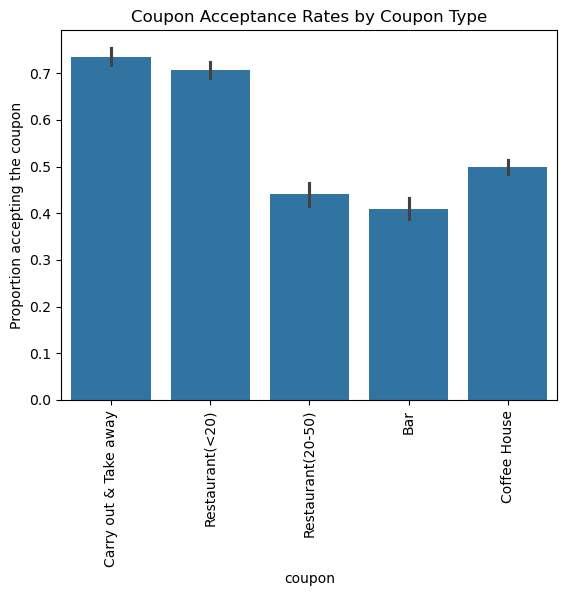

In [77]:

# Using Seaborn to plot the bar chart:
sns.barplot(
    x='coupon',  # X-Axis
    y='Y',       # Y-Axis
    data=data,
    # Without this 'order' below, the two restaurant columns were not adjacent:
    order=['Carry out & Take away',
           'Restaurant(<20)', 'Restaurant(20-50)',
           'Bar','Coffee House']
)
plt.xticks(rotation=90)   # The X-Axis labels overlapped without this rotation.
plt.ylabel("Proportion accepting the coupon")
plt.title("Coupon Acceptance Rates by Coupon Type")
plt.show()

6. Use a histogram to visualize the temperature column.

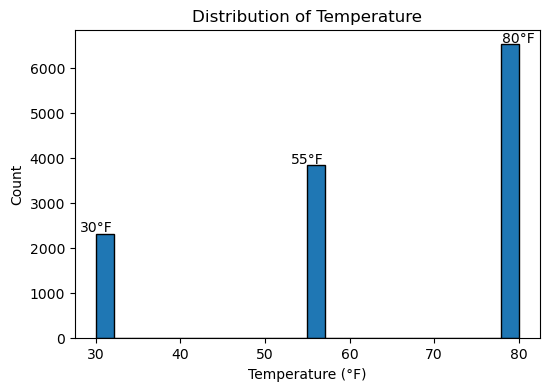

In [82]:
# Using Matplotlib to do the histogram

# 1. Set the figure size
plt.figure(figsize=(6,4))

# 2. Create the histogram (automatic bins, black edges)
plt.hist(vals, bins='auto', edgecolor='black')

# 3. Add labels above each bar
# Note we know from the data investigation
# that there are only 3 distinct temperatures: 30,55,80
for t in vals.unique():      # Alernatively ... for t in [30, 55, 80]:
    count = (vals == t).sum()   
    plt.text(t, count + 50, f"{t}°F", ha='center')

# 4. Label the X-axis
plt.xlabel('Temperature (°F)')

# 5. Label the Y-axis
plt.ylabel('Count')

# 6. Add a title
plt.title('Distribution of Temperature')

# 7. Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  